In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston

In [73]:
# boston=sns.load_dataset('boston')
boston_sklearn=load_boston()
df=pd.DataFrame(data=boston_sklearn.data)
df.columns = boston_sklearn.feature_names
df.head()
df['PRICE']=boston_sklearn.target
df.shape

(506, 14)

In [74]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [75]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [76]:
X=boston_sklearn.data
y=boston_sklearn.target
print(X.shape)
print(y.shape)
type(X)

(506, 13)
(506,)


numpy.ndarray

In [77]:
# Normalizing the dataset
means=np.mean(X,axis=0)
std=np.std(X,axis=0)

In [78]:
# Normalizing this dataset each future having 0 mean and unit variance
X=(X-means)/std
X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [79]:
# putting ones in the X matrix
ones=np.ones((X.shape[0],1))
X=np.hstack((ones,X))
print(X.shape)

(506, 14)


In [94]:
X_train=X[:420]
Y_train=y[:420]
X_test=X[420:]
Y_test=y[420:]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
X_train

(420, 14)
(420,)
(86, 14)
(86,)


array([[ 1.        , -0.41978194,  0.28482986, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [ 1.        , -0.41733926, -0.48772236, ..., -0.30309415,
         0.44105193, -0.49243937],
       [ 1.        , -0.41734159, -0.48772236, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [ 1.        ,  2.59827406, -0.48772236, ...,  0.80657583,
        -2.51428122,  1.96060184],
       [ 1.        ,  8.13688351, -0.48772236, ...,  0.80657583,
        -3.7303382 ,  1.11675567],
       [ 1.        ,  0.95411812, -0.48772236, ...,  0.80657583,
        -3.37947874,  1.41392409]])

In [101]:

def hypothesis(X,theta):
    return np.dot(X,theta)

def cost_function(X,y,theta):
    error=0.0
    y_=hypothesis(X,theta)
    error=np.mean((y-y_)**2)
    return error

def gradient(X,y,theta):
    y_=hypothesis(X,theta)
    grad=np.dot(X.T,(y_-y))
    m=X.shape[0]
    return grad/m
def gradient_descent(X,y,learning_rate=0.1,max_iters=300):
    n=X.shape[1]
    theta=np.zeros((n,))
    error_list=[]

    for i in range(max_iters):
        e=cost_function(X,y,theta)
        error_list.append(e)

        grad=gradient(X,y,theta)
        theta=theta-(learning_rate*grad)
    return theta,error_list

In [107]:
theta,loss=gradient_descent(X,y)

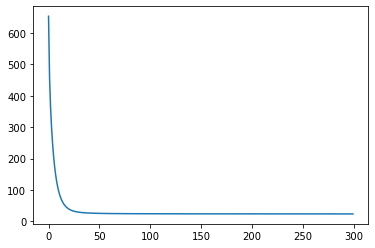

In [105]:
import matplotlib.pyplot as plt
plt.plot(loss)
plt.show()

In [108]:
def r2_score(y,y_):
    num=np.sum((y-y_)**2)
    denom=np.sum((y-y.mean())**2)
    score=(1-num/denom)
    return score*100

In [111]:
predictions=hypothesis(X,theta)

72.19251431996562

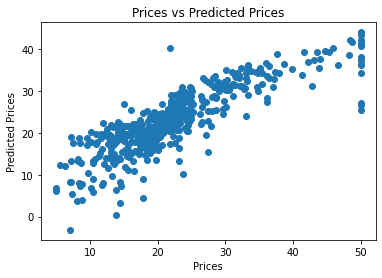

In [113]:
plt.scatter(y,predictions)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

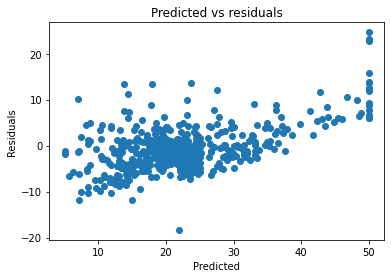

In [114]:
# Checking residuals
plt.scatter(y,y-predictions)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

E:\Programs\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


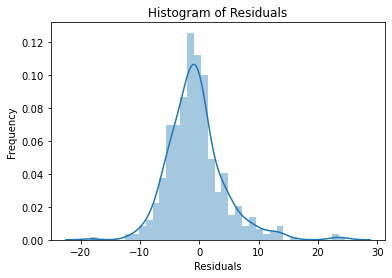

In [117]:
# Checking normality of errors
sns.distplot(y-predictions)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [118]:
r2_score(y,predictions)

72.19251431996562